Data Collection: Gather a large dataset of news articles. This could be done through web scraping, APIs, or using existing datasets.

Text Preprocessing:

Tokenization: Split the text into words or tokens.
Stopword Removal: Eliminate common words that don't contribute much meaning (like "and", "the", etc.).
Stemming/Lemmatization: Reduce words to their base or root form.
Removing Punctuation and Special Characters: Clean up the text to retain only alphanumeric characters.
Feature Extraction:

Convert text data into numerical form using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings (like Word2Vec, GloVe).
These methods help in representing text in a way that captures the semantic meaning and importance of words in the document.
Dimensionality Reduction (Optional but recommended for large datasets):

Techniques like PCA (Principal Component Analysis) or t-SNE can be used to reduce the number of features while retaining the essential information.
This step helps in reducing computational complexity and improving clustering performance.
Clustering:

Apply clustering algorithms like K-means, DBSCAN, or Hierarchical clustering on the processed text data.
These algorithms will group articles into clusters based on the similarity of their content.
NLP Techniques for Improved Clustering:

Topic Modeling: Techniques like LDA (Latent Dirichlet Allocation) can be used to identify topics within the articles. This can guide or enhance the clustering process.
Named Entity Recognition (NER): Identifying and classifying key entities (like people, organizations, locations) can provide additional features for clustering.
Sentiment Analysis: Understanding the sentiment of the articles might also help in clustering, especially for differentiating articles with similar content but different tones.

In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

sys.path.append("../")

from pipeline import *

## Load headlines

In [9]:
df = pd.read_csv("complete_data.csv")
df.index = pd.to_datetime(df['datetime'])

display(df)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime
datetime,,,,,,,,,,,,
2023-12-31 07:00:56+00:00,business/2023/dec/31/smiles-all-round-as-finan...,article,business,Business,2023-12-31T07:00:56Z,Smiles all round as financial markets end 2023...,https://www.theguardian.com/business/2023/dec/...,https://content.guardianapis.com/business/2023...,False,pillar/news,News,2023-12-31 07:00:56+00:00
2023-12-28 16:02:15+00:00,business/live/2023/dec/28/pound-dollar-uk-econ...,liveblog,business,Business,2023-12-28T16:02:15Z,"UK dealmaking shrinks in 2023, but economy pre...",https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-12-28 16:02:15+00:00
2023-12-27 16:17:09+00:00,business/live/2023/dec/27/stock-markets-santa-...,liveblog,business,Business,2023-12-27T16:17:09Z,New York Times accuses ChatGPT maker OpenAI an...,https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-12-27 16:17:09+00:00
2023-12-27 09:00:02+00:00,global-development/2023/dec/27/uruguays-green-...,article,global-development,Global development,2023-12-27T09:00:02Z,Uruguay’s green power revolution: rapid shift ...,https://www.theguardian.com/global-development...,https://content.guardianapis.com/global-develo...,False,pillar/news,News,2023-12-27 09:00:02+00:00
2023-12-24 04:22:30+00:00,world/2023/dec/24/us-says-it-shot-down-four-dr...,article,world,World news,2023-12-24T04:22:30Z,US says it shot down four drones in southern R...,https://www.theguardian.com/world/2023/dec/24/...,https://content.guardianapis.com/world/2023/de...,False,pillar/news,News,2023-12-24 04:22:30+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2004-01-14 17:13:00+00:00,business/2004/jan/14/usnews.money,article,business,Business,2004-01-14T17:13:00Z,US exports exceed expectation,https://www.theguardian.com/business/2004/jan/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-01-14 17:13:00+00:00
2004-01-10 02:12:56+00:00,money/2004/jan/10/business.usnews,article,money,Money,2004-01-10T02:12:56Z,Dollar trades at record low,https://www.theguardian.com/money/2004/jan/10/...,https://content.guardianapis.com/money/2004/ja...,False,pillar/lifestyle,Lifestyle,2004-01-10 02:12:56+00:00
2004-01-10 02:12:55+00:00,business/2004/jan/10/oilandpetrol.news,article,business,Business,2004-01-10T02:12:55Z,Sir Philip ducks out as Shell cuts reserves,https://www.theguardian.com/business/2004/jan/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-01-10 02:12:55+00:00


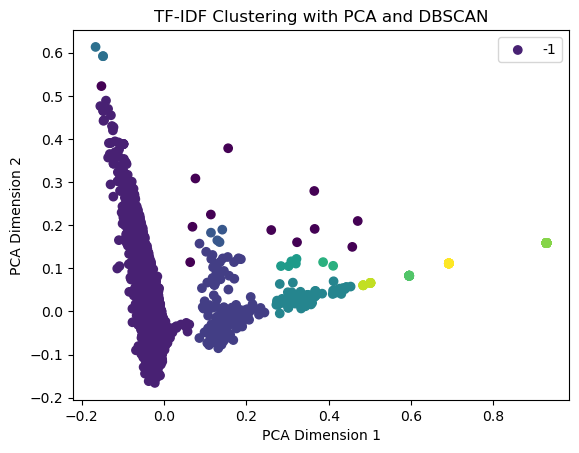

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2023-12-31 07:00:56+00:00,business/2023/dec/31/smiles-all-round-as-finan...,article,business,Business,2023-12-31T07:00:56Z,Smiles all round as financial markets end 2023...,https://www.theguardian.com/business/2023/dec/...,https://content.guardianapis.com/business/2023...,False,pillar/news,News,2023-12-31 07:00:56+00:00,0
2023-12-28 16:02:15+00:00,business/live/2023/dec/28/pound-dollar-uk-econ...,liveblog,business,Business,2023-12-28T16:02:15Z,"UK dealmaking shrinks in 2023, but economy pre...",https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-12-28 16:02:15+00:00,0
2023-12-27 16:17:09+00:00,business/live/2023/dec/27/stock-markets-santa-...,liveblog,business,Business,2023-12-27T16:17:09Z,New York Times accuses ChatGPT maker OpenAI an...,https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-12-27 16:17:09+00:00,0
2023-12-27 09:00:02+00:00,global-development/2023/dec/27/uruguays-green-...,article,global-development,Global development,2023-12-27T09:00:02Z,Uruguay’s green power revolution: rapid shift ...,https://www.theguardian.com/global-development...,https://content.guardianapis.com/global-develo...,False,pillar/news,News,2023-12-27 09:00:02+00:00,0
2023-12-24 04:22:30+00:00,world/2023/dec/24/us-says-it-shot-down-four-dr...,article,world,World news,2023-12-24T04:22:30Z,US says it shot down four drones in southern R...,https://www.theguardian.com/world/2023/dec/24/...,https://content.guardianapis.com/world/2023/de...,False,pillar/news,News,2023-12-24 04:22:30+00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-01-14 17:13:00+00:00,business/2004/jan/14/usnews.money,article,business,Business,2004-01-14T17:13:00Z,US exports exceed expectation,https://www.theguardian.com/business/2004/jan/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-01-14 17:13:00+00:00,0
2004-01-10 02:12:56+00:00,money/2004/jan/10/business.usnews,article,money,Money,2004-01-10T02:12:56Z,Dollar trades at record low,https://www.theguardian.com/money/2004/jan/10/...,https://content.guardianapis.com/money/2004/ja...,False,pillar/lifestyle,Lifestyle,2004-01-10 02:12:56+00:00,0
2004-01-10 02:12:55+00:00,business/2004/jan/10/oilandpetrol.news,article,business,Business,2004-01-10T02:12:55Z,Sir Philip ducks out as Shell cuts reserves,https://www.theguardian.com/business/2004/jan/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-01-10 02:12:55+00:00,0


 0     6791
 1      170
 4       90
 8       35
 10      27
 7       15
-1       12
 9       10
 5        5
 2        4
 3        3
 6        2
Name: cluster, dtype: int64


In [15]:
documents = df['webTitle'].tolist()

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# PCA dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# DBSCAN clustering
dbscan = DBSCAN(eps=0.03, min_samples=2)
clusters = dbscan.fit_predict(X_reduced)

# add cluster labels to plot legend
unique_labels = np.unique(clusters)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("TF-IDF Clustering with PCA and DBSCAN")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(unique_labels)
plt.show()


# add cluster labels to dataframe
df['cluster'] = clusters

display(df)

# print frequency
print(df['cluster'].value_counts())


In [12]:
# display all cluster from news_data
for cluster in np.unique(clusters):
    print("Cluster {}".format(cluster))
    display(df[df['cluster'] == cluster])

Cluster -1


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2023-11-13 15:19:20+00:00,business/live/2023/nov/13/uk-house-asking-pric...,liveblog,business,Business,2023-11-13T15:19:20Z,UK house asking prices in largest November fal...,https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-11-13 15:19:20+00:00,-1
2021-10-25 09:34:36+00:00,money/2021/oct/25/uk-petrol-prices-record-high...,article,money,Money,2021-10-25T09:34:36Z,UK petrol price hits all-time high amid oil ma...,https://www.theguardian.com/money/2021/oct/25/...,https://content.guardianapis.com/money/2021/oc...,False,pillar/lifestyle,Lifestyle,2021-10-25 09:34:36+00:00,-1
2021-03-05 15:24:48+00:00,business/live/2021/mar/05/oil-prices-climb-to-...,liveblog,business,Business,2021-03-05T15:24:48Z,"US labour market strengthens after jobs surge,...",https://www.theguardian.com/business/live/2021...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2021-03-05 15:24:48+00:00,-1
2016-05-30 10:00:00+00:00,business/2016/may/30/opec-oil-market-prices-pr...,article,business,Business,2016-05-30T10:00:00Z,Is Opec relevant in an oil market of falling p...,https://www.theguardian.com/business/2016/may/...,https://content.guardianapis.com/business/2016...,False,pillar/news,News,2016-05-30 10:00:00+00:00,-1
2012-03-19 18:05:25+00:00,business/economics-blog/2012/mar/19/oil-market...,article,business,Business,2012-03-19T18:05:25Z,The oil market is warming up,https://www.theguardian.com/business/economics...,https://content.guardianapis.com/business/econ...,False,pillar/news,News,2012-03-19 18:05:25+00:00,-1
2011-02-23 09:43:17+00:00,business/marketforceslive/2011/feb/23/oil-surg...,article,business,Business,2011-02-23T09:43:17Z,High oil prices weigh on market,https://www.theguardian.com/business/marketfor...,https://content.guardianapis.com/business/mark...,False,pillar/news,News,2011-02-23 09:43:17+00:00,-1
2008-08-20 23:01:00+00:00,business/2008/aug/21/marketforces.tullowoil,article,business,Business,2008-08-20T23:01:00Z,Market forces: Tullow Oil in demand,https://www.theguardian.com/business/2008/aug/...,https://content.guardianapis.com/business/2008...,False,pillar/news,News,2008-08-20 23:01:00+00:00,-1
2008-05-15 23:26:36+00:00,business/2008/may/16/cairnenergybusiness.stock...,article,business,Business,2008-05-15T23:26:36Z,Market forces: $200 a barrel oil is good news ...,https://www.theguardian.com/business/2008/may/...,https://content.guardianapis.com/business/2008...,False,pillar/news,News,2008-05-15 23:26:36+00:00,-1
2008-01-03 10:21:07+00:00,news/2008/jan/03/wrap.rostaylor,article,uk-news,UK news,2008-01-03T10:21:07Z,New high for oil prices,https://www.theguardian.com/news/2008/jan/03/w...,https://content.guardianapis.com/news/2008/jan...,False,pillar/news,News,2008-01-03 10:21:07+00:00,-1


Cluster 0


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2023-12-31 07:00:56+00:00,business/2023/dec/31/smiles-all-round-as-finan...,article,business,Business,2023-12-31T07:00:56Z,Smiles all round as financial markets end 2023...,https://www.theguardian.com/business/2023/dec/...,https://content.guardianapis.com/business/2023...,False,pillar/news,News,2023-12-31 07:00:56+00:00,0
2023-12-28 16:02:15+00:00,business/live/2023/dec/28/pound-dollar-uk-econ...,liveblog,business,Business,2023-12-28T16:02:15Z,"UK dealmaking shrinks in 2023, but economy pre...",https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-12-28 16:02:15+00:00,0
2023-12-27 16:17:09+00:00,business/live/2023/dec/27/stock-markets-santa-...,liveblog,business,Business,2023-12-27T16:17:09Z,New York Times accuses ChatGPT maker OpenAI an...,https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-12-27 16:17:09+00:00,0
2023-12-27 09:00:02+00:00,global-development/2023/dec/27/uruguays-green-...,article,global-development,Global development,2023-12-27T09:00:02Z,Uruguay’s green power revolution: rapid shift ...,https://www.theguardian.com/global-development...,https://content.guardianapis.com/global-develo...,False,pillar/news,News,2023-12-27 09:00:02+00:00,0
2023-12-24 04:22:30+00:00,world/2023/dec/24/us-says-it-shot-down-four-dr...,article,world,World news,2023-12-24T04:22:30Z,US says it shot down four drones in southern R...,https://www.theguardian.com/world/2023/dec/24/...,https://content.guardianapis.com/world/2023/de...,False,pillar/news,News,2023-12-24 04:22:30+00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-01-14 17:13:00+00:00,business/2004/jan/14/usnews.money,article,business,Business,2004-01-14T17:13:00Z,US exports exceed expectation,https://www.theguardian.com/business/2004/jan/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-01-14 17:13:00+00:00,0
2004-01-10 02:12:56+00:00,money/2004/jan/10/business.usnews,article,money,Money,2004-01-10T02:12:56Z,Dollar trades at record low,https://www.theguardian.com/money/2004/jan/10/...,https://content.guardianapis.com/money/2004/ja...,False,pillar/lifestyle,Lifestyle,2004-01-10 02:12:56+00:00,0
2004-01-10 02:12:55+00:00,business/2004/jan/10/oilandpetrol.news,article,business,Business,2004-01-10T02:12:55Z,Sir Philip ducks out as Shell cuts reserves,https://www.theguardian.com/business/2004/jan/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-01-10 02:12:55+00:00,0


Cluster 1


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2023-10-04 16:04:37+00:00,business/live/2023/oct/04/tesco-food-inflation...,liveblog,business,Business,2023-10-04T16:04:37Z,UK 30-year borrowing costs hit highest since 1...,https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-10-04 16:04:37+00:00,1
2023-10-04 11:36:32+00:00,business/2023/oct/04/bond-market-sell-off-send...,article,business,Business,2023-10-04T11:36:32Z,Bond market sell-off sends UK long-term borrow...,https://www.theguardian.com/business/2023/oct/...,https://content.guardianapis.com/business/2023...,False,pillar/news,News,2023-10-04 11:36:32+00:00,1
2023-09-18 14:03:06+00:00,business/live/2023/sep/18/uk-rents-soar-high-i...,liveblog,business,Business,2023-09-18T14:03:06Z,UK rents soar as high interest rates hit prope...,https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-09-18 14:03:06+00:00,1
2023-08-21 14:05:42+00:00,business/live/2023/aug/21/uk-home-sellers-slas...,liveblog,business,Business,2023-08-21T14:05:42Z,Homebuilder shares tumble as UK housing market...,https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-08-21 14:05:42+00:00,1
2023-08-02 15:18:11+00:00,business/live/2023/aug/02/markets-fall--us-cre...,liveblog,business,Business,2023-08-02T15:18:11Z,Wall Street opens in the red amid global marke...,https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-08-02 15:18:11+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-09-25 00:37:06+00:00,business/2005/sep/25/oilandpetrol.news,article,business,Business,2005-09-25T00:37:06Z,Oil market braced for Rita blast,https://www.theguardian.com/business/2005/sep/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-09-25 00:37:06+00:00,1
2005-08-30 23:01:15+00:00,business/2005/aug/31/ftse.stockmarkets,article,business,Business,2005-08-30T23:01:15Z,Neil Hume: Oil price speeds FTSE recovery,https://www.theguardian.com/business/2005/aug/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-08-30 23:01:15+00:00,1
2005-02-05 01:21:53+00:00,business/2005/feb/05/politics.oilandpetrol,article,business,Business,2005-02-05T01:21:53Z,Chancellor tells Opec that oil market manipula...,https://www.theguardian.com/business/2005/feb/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-02-05 01:21:53+00:00,1


Cluster 2


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2020-04-20 23:54:27+00:00,world/live/2020/apr/20/coronavirus-live-news-u...,liveblog,world,World news,2020-04-20T23:54:27Z,US oil market collapses into negative prices –...,https://www.theguardian.com/world/live/2020/ap...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News,2020-04-20 23:54:27+00:00,2
2020-04-15 18:05:29+00:00,business/2020/apr/15/oil-prices-slump-as-marke...,article,business,Business,2020-04-15T18:05:29Z,Oil prices slump as market faces lowest demand...,https://www.theguardian.com/business/2020/apr/...,https://content.guardianapis.com/business/2020...,False,pillar/news,News,2020-04-15 18:05:29+00:00,2
2011-02-21 21:47:16+00:00,business/2011/feb/21/libya-uprising-oil-price,article,business,Business,2011-02-21T21:47:16Z,Libya uprising forces oil price to highest poi...,https://www.theguardian.com/business/2011/feb/...,https://content.guardianapis.com/business/2011...,False,pillar/news,News,2011-02-21 21:47:16+00:00,2
2007-07-18 08:07:05+00:00,business/2007/jul/18/money.oilandpetrol,article,business,Business,2007-07-18T08:07:05Z,Petrol hits £1 a litre with no end in sight to...,https://www.theguardian.com/business/2007/jul/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-07-18 08:07:05+00:00,2


Cluster 3


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2011-11-03 15:01:25+00:00,business/blog/2011/nov/03/why-oil-prices-so-high,article,business,Business,2011-11-03T15:01:25Z,Why are oil prices so high?,https://www.theguardian.com/business/blog/2011...,https://content.guardianapis.com/business/blog...,False,pillar/news,News,2011-11-03 15:01:25+00:00,3
2006-07-27 09:36:11+00:00,commentisfree/2006/jul/27/bloodinbeirut7505aba...,article,commentisfree,Opinion,2006-07-27T09:36:11Z,It's all about oil,https://www.theguardian.com/commentisfree/2006...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,2006-07-27 09:36:11+00:00,3
2005-08-12 14:58:32+00:00,business/2005/aug/12/businessqandas.oilandpetrol,article,business,Business,2005-08-12T14:58:32Z,Q&A: Oil,https://www.theguardian.com/business/2005/aug/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-08-12 14:58:32+00:00,3


Cluster 4


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2009-08-26 07:24:19+00:00,business/marketforceslive/2009/aug/26/recessio...,article,business,Business,2009-08-26T07:24:19Z,Market forces breaking news: Pawnbroker H&T en...,https://www.theguardian.com/business/marketfor...,https://content.guardianapis.com/business/mark...,False,pillar/news,News,2009-08-26 07:24:19+00:00,4
2009-05-20 21:25:15+00:00,business/2009/may/20/market-forces-mothercare-...,article,business,Business,2009-05-20T21:25:15Z,Market forces: Mothercare investor throws the ...,https://www.theguardian.com/business/2009/may/...,https://content.guardianapis.com/business/2009...,False,pillar/news,News,2009-05-20 21:25:15+00:00,4
2009-05-15 23:47:16+00:00,business/2009/may/16/market-forces-rio-tinto-i...,article,business,Business,2009-05-15T23:47:16Z,Market forces: Rio clears one hurdle towards C...,https://www.theguardian.com/business/2009/may/...,https://content.guardianapis.com/business/2009...,False,pillar/news,News,2009-05-15 23:47:16+00:00,4
2009-04-15 23:01:00+00:00,business/2009/apr/16/market-forces-reed-elsevier,article,business,Business,2009-04-15T23:01:00Z,"Market Forces: Rush for Reed, but other stocks...",https://www.theguardian.com/business/2009/apr/...,https://content.guardianapis.com/business/2009...,False,pillar/news,News,2009-04-15 23:01:00+00:00,4
2009-02-28 00:01:00+00:00,business/2009/feb/28/market-forces-nick-fletcher,article,business,Business,2009-02-28T00:01:00Z,Market Forces: Bail-out worries cause sinking ...,https://www.theguardian.com/business/2009/feb/...,https://content.guardianapis.com/business/2009...,False,pillar/news,News,2009-02-28 00:01:00+00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-01 00:07:06+00:00,business/2005/jan/01/2,article,business,Business,2005-01-01T00:07:06Z,Ashley Seager: Market forces,https://www.theguardian.com/business/2005/jan/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-01-01 00:07:06+00:00,4
2004-08-28 01:33:11+00:00,business/2004/aug/28/ftse.utilities,article,business,Business,2004-08-28T01:33:11Z,Market forces: Grid offers sole spark of the day,https://www.theguardian.com/business/2004/aug/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-08-28 01:33:11+00:00,4
2004-06-02 01:12:01+00:00,business/2004/jun/02/ftse.stockmarkets,article,business,Business,2004-06-02T01:12:01Z,Market forces: ICI rises above crude crisis,https://www.theguardian.com/business/2004/jun/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-06-02 01:12:01+00:00,4


Cluster 5


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2009-06-15 23:01:00+00:00,business/2009/jun/16/market-forces-ftse-fall,article,business,Business,2009-06-15T23:01:00Z,Market forces: FTSE suffers biggest fall in we...,https://www.theguardian.com/business/2009/jun/...,https://content.guardianapis.com/business/2009...,False,pillar/news,News,2009-06-15 23:01:00+00:00,5
2007-04-13 13:57:15+00:00,business/2007/apr/13/ftse.marketforces,article,business,Business,2007-04-13T13:57:15Z,Market forces: Cocktail of oil and beer cheers...,https://www.theguardian.com/business/2007/apr/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-04-13 13:57:15+00:00,5
2006-11-18 23:48:23+00:00,business/2006/nov/18/ftse.marketforces,article,business,Business,2006-11-18T23:48:23Z,Market forces: Slipping oil and soft metals dr...,https://www.theguardian.com/business/2006/nov/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-11-18 23:48:23+00:00,5
2006-10-21 22:52:19+00:00,business/2006/oct/21/marketforces,article,business,Business,2006-10-21T22:52:19Z,"Market forces: Oil gushed a bit, but quickly ...",https://www.theguardian.com/business/2006/oct/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-10-21 22:52:19+00:00,5
2006-04-10 23:41:01+00:00,business/2006/apr/11/marketforces,article,business,Business,2006-04-10T23:41:01Z,Market forces: Miners still shine thanks to me...,https://www.theguardian.com/business/2006/apr/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-04-10 23:41:01+00:00,5


Cluster 6


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2009-03-10 00:01:00+00:00,business/2009/mar/10/ftse-100-rise,article,business,Business,2009-03-10T00:01:00Z,Market Forces: FTSE rises on hopes of Opec pro...,https://www.theguardian.com/business/2009/mar/...,https://content.guardianapis.com/business/2009...,False,pillar/news,News,2009-03-10 00:01:00+00:00,6
2006-05-02 23:03:51+00:00,business/2006/may/03/marketforces,article,business,Business,2006-05-02T23:03:51Z,Market forces: Cairn can rise further on crude...,https://www.theguardian.com/business/2006/may/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-05-02 23:03:51+00:00,6


Cluster 7


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2007-11-02 23:44:27+00:00,business/2007/nov/02/marketforces,article,business,Business,2007-11-02T23:44:27Z,Nick Fletcher: Market forces,https://www.theguardian.com/business/2007/nov/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-11-02 23:44:27+00:00,7
2007-10-03 23:02:14+00:00,business/2007/oct/04/marketforces,article,business,Business,2007-10-03T23:02:14Z,Nick Fletcher: Market forces,https://www.theguardian.com/business/2007/oct/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-10-03 23:02:14+00:00,7
2007-09-05 22:48:21+00:00,business/2007/sep/05/marketforces,article,business,Business,2007-09-05T22:48:21Z,Nick Fletcher: Market forces,https://www.theguardian.com/business/2007/sep/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-09-05 22:48:21+00:00,7
2007-07-13 22:40:54+00:00,business/2007/jul/13/marketforces,article,business,Business,2007-07-13T22:40:54Z,Nick Fletcher: market forces,https://www.theguardian.com/business/2007/jul/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-07-13 22:40:54+00:00,7
2007-07-07 22:35:29+00:00,business/2007/jul/07/marketforces,article,business,Business,2007-07-07T22:35:29Z,Nick Fletcher: Market forces,https://www.theguardian.com/business/2007/jul/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-07-07 22:35:29+00:00,7
2007-06-29 22:45:41+00:00,business/2007/jun/29/marketforces.cadburyschwe...,article,business,Business,2007-06-29T22:45:41Z,Nick Fletcher: Market forces,https://www.theguardian.com/business/2007/jun/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-06-29 22:45:41+00:00,7
2007-06-27 17:07:06+00:00,business/2007/jun/27/marketforces.baesystemsbu...,article,world,World news,2007-06-27T17:07:06Z,Nick Fletcher: market forces,https://www.theguardian.com/business/2007/jun/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-06-27 17:07:06+00:00,7
2007-06-15 22:45:37+00:00,business/2007/jun/15/bradfordbingleybusiness.i...,article,business,Business,2007-06-15T22:45:37Z,Nick Fletcher: market forces,https://www.theguardian.com/business/2007/jun/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-06-15 22:45:37+00:00,7
2007-05-19 13:04:57+00:00,business/2007/may/19/ftse.marketforces,article,business,Business,2007-05-19T13:04:57Z,Nick Fletcher: Market forces,https://www.theguardian.com/business/2007/may/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-05-19 13:04:57+00:00,7


Cluster 8


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2007-06-22 11:57:47+00:00,business/2007/jun/22/marketforces1,article,business,Business,2007-06-22T11:57:47Z,Market forces,https://www.theguardian.com/business/2007/jun/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-06-22 11:57:47+00:00,8
2007-01-10 11:47:14+00:00,business/2007/jan/10/ftse.marketforces,article,business,Business,2007-01-10T11:47:14Z,Market forces,https://www.theguardian.com/business/2007/jan/...,https://content.guardianapis.com/business/2007...,False,pillar/news,News,2007-01-10 11:47:14+00:00,8
2006-08-30 00:09:31+00:00,business/2006/aug/30/marketforces.britishairwa...,article,business,Business,2006-08-30T00:09:31Z,Market forces,https://www.theguardian.com/business/2006/aug/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-08-30 00:09:31+00:00,8
2006-08-22 22:56:35+00:00,business/2006/aug/22/marketforces,article,business,Business,2006-08-22T22:56:35Z,Market forces,https://www.theguardian.com/business/2006/aug/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-08-22 22:56:35+00:00,8
2006-01-04 01:14:06+00:00,business/2006/jan/04/3,article,business,Business,2006-01-04T01:14:06Z,Market forces,https://www.theguardian.com/business/2006/jan/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-01-04 01:14:06+00:00,8
2005-12-06 01:05:12+00:00,business/2005/dec/06/3,article,business,Business,2005-12-06T01:05:12Z,Market forces,https://www.theguardian.com/business/2005/dec/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-12-06 01:05:12+00:00,8
2005-11-29 15:15:28+00:00,business/2005/nov/29/ftse.budget2006,article,business,Business,2005-11-29T15:15:28Z,Market forces,https://www.theguardian.com/business/2005/nov/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-11-29 15:15:28+00:00,8
2005-10-20 23:01:22+00:00,business/2005/oct/21/1,article,business,Business,2005-10-20T23:01:22Z,Market forces,https://www.theguardian.com/business/2005/oct/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-10-20 23:01:22+00:00,8
2005-09-26 23:03:50+00:00,business/2005/sep/27/ftse.stockmarkets,article,business,Business,2005-09-26T23:03:50Z,Market forces,https://www.theguardian.com/business/2005/sep/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-09-26 23:03:50+00:00,8


Cluster 9


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2006-07-25 22:45:31+00:00,business/2006/jul/25/marketforces,article,business,Business,2006-07-25T22:45:31Z,Market forces: Simon Bowers,https://www.theguardian.com/business/2006/jul/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-07-25 22:45:31+00:00,9
2006-07-01 22:52:38+00:00,business/2006/jul/01/marketforces,article,business,Business,2006-07-01T22:52:38Z,Richard Wray: market forces,https://www.theguardian.com/business/2006/jul/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-07-01 22:52:38+00:00,9
2006-06-24 00:21:03+00:00,business/2006/jun/24/ftse.marketforces,article,business,Business,2006-06-24T00:21:03Z,Richard Wray: market forces,https://www.theguardian.com/business/2006/jun/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-06-24 00:21:03+00:00,9
2005-12-16 01:08:31+00:00,business/2005/dec/16/2,article,business,Business,2005-12-16T01:08:31Z,Richard Wray: Market forces,https://www.theguardian.com/business/2005/dec/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-12-16 01:08:31+00:00,9
2005-11-10 01:42:48+00:00,business/2005/nov/10/4,article,business,Business,2005-11-10T01:42:48Z,Simon Bowers: market forces,https://www.theguardian.com/business/2005/nov/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-11-10 01:42:48+00:00,9
2005-08-20 10:47:47+00:00,business/2005/aug/20/3,article,business,Business,2005-08-20T10:47:47Z,Richard Wray: market forces,https://www.theguardian.com/business/2005/aug/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-08-20 10:47:47+00:00,9
2005-08-19 01:52:01+00:00,business/2005/aug/19/4,article,business,Business,2005-08-19T01:52:01Z,Simon Bowers: market forces,https://www.theguardian.com/business/2005/aug/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-08-19 01:52:01+00:00,9
2005-08-01 23:02:10+00:00,business/2005/aug/02/3,article,business,Business,2005-08-01T23:02:10Z,Richard Wray: market forces,https://www.theguardian.com/business/2005/aug/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-08-01 23:02:10+00:00,9
2005-06-24 23:06:09+00:00,business/2005/jun/25/1,article,business,Business,2005-06-24T23:06:09Z,Simon Bowers: Market forces,https://www.theguardian.com/business/2005/jun/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-06-24 23:06:09+00:00,9


Cluster 10


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,cluster
datetime,,,,,,,,,,,,,
2006-03-02 00:04:26+00:00,business/2006/mar/02/ftse.marketforces,article,business,Business,2006-03-02T00:04:26Z,Neil Hume: market forces,https://www.theguardian.com/business/2006/mar/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-03-02 00:04:26+00:00,10
2006-02-21 01:24:33+00:00,business/2006/feb/21/3,article,business,Business,2006-02-21T01:24:33Z,Neil Hume: market forces,https://www.theguardian.com/business/2006/feb/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-02-21 01:24:33+00:00,10
2006-02-16 00:55:27+00:00,business/2006/feb/16/ftse.marketforces,article,business,Business,2006-02-16T00:55:27Z,Neil Hume: market Forces,https://www.theguardian.com/business/2006/feb/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-02-16 00:55:27+00:00,10
2006-02-15 00:56:40+00:00,business/2006/feb/15/marketforces.cadburyschwe...,article,business,Business,2006-02-15T00:56:40Z,Neil Hume: Market forces,https://www.theguardian.com/business/2006/feb/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-02-15 00:56:40+00:00,10
2006-01-17 00:37:08+00:00,business/2006/jan/17/4,article,business,Business,2006-01-17T00:37:08Z,Neil Hume: market forces,https://www.theguardian.com/business/2006/jan/...,https://content.guardianapis.com/business/2006...,False,pillar/news,News,2006-01-17 00:37:08+00:00,10
2005-10-07 01:09:32+00:00,business/2005/oct/07/8,article,business,Business,2005-10-07T01:09:32Z,Neil Hume: market forces,https://www.theguardian.com/business/2005/oct/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-10-07 01:09:32+00:00,10
2005-09-07 23:00:33+00:00,business/2005/sep/08/2,article,business,Business,2005-09-07T23:00:33Z,Neil Hume: market forces,https://www.theguardian.com/business/2005/sep/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-09-07 23:00:33+00:00,10
2005-08-22 23:02:57+00:00,business/2005/aug/23/ftse.stockmarkets,article,business,Business,2005-08-22T23:02:57Z,Neil Hume: market forces,https://www.theguardian.com/business/2005/aug/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-08-22 23:02:57+00:00,10
2005-07-21 22:57:12+00:00,business/2005/jul/21/8,article,business,Business,2005-07-21T22:57:12Z,Neil Hume: market forces,https://www.theguardian.com/business/2005/jul/...,https://content.guardianapis.com/business/2005...,False,pillar/news,News,2005-07-21 22:57:12+00:00,10
